In [168]:
import pandas as pd
import csv
import os
import time
from collections import defaultdict
import numpy as np
import itertools
import db_structure
import networkx as nx
from imp import reload
import matplotlib.pyplot as plt
import utilities as u
from flask import jsonify
import logging
# import exceptions
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

logging.basicConfig(format=' %(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
%load_ext autoreload
%aimport -web
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [404]:
db = db_structure.DB(os.path.join('datasets', 'TOPICC'))
dm = db_structure.DataManager(db)

 2019-10-11 12:21:30,761 - INFO - Loading datasets\TOPICC
 2019-10-11 12:21:30,767 - INFO - Loading arch file: datasets\TOPICC\TOPICC.arch


In [424]:
all_chosen_idxs = ['291', '323']
paths = db.find_paths_multi_columns(all_chosen_idxs)
df = dm.get_biggest_joined_df_option_from_paths(paths, filter_col_idxs=all_chosen_idxs)

 2019-10-11 12:57:08,044 - DEBUG - Loading file datasets\TOPICC\HOSPITALADMIT.csv


In [425]:
print(len(df))
df.head()

275


,DeathTime_[DEATH],Ethnicity_[HOSPITALADMIT]
0,1203,Not Hispanic or Latino
1,1440,Not Hispanic or Latino
2,1903,Unknown or Not Reported
3,1922,Unknown or Not Reported
4,132,Unknown or Not Reported


In [407]:
filters = {'291': {'type': 'range', 'filter': {'min': 890, 'max': 1226, 'bins': '8'}}, '323': {'type': 'list', 'filter': ['Hispanic or Latino', 'Not Hispanic or Latino']}}

In [408]:
filters = dm.rewrite_filters(filters)

In [409]:
filters

{'260': {'type': 'bins',
  'filter': [715.0,
   871.8571428571429,
   1028.7142857142858,
   1185.5714285714287,
   1342.4285714285713,
   1499.2857142857142,
   1656.142857142857,
   1813.0]},
 '294': {'type': 'list',
  'filter': ['Withdrawal of care', 'Limitation of care']}}

In [410]:
new_df = dm.filter_df(df, filters)

In [411]:
print(len(new_df))
new_df

33


,CardiacSurgTime_[CARDIACSURGERY],DeathMode_[DEATH]
0,"(1342.4285714285713, 1499.2857142857142)",Withdrawal of care
2,"(715.0, 871.8571428571429)",Withdrawal of care
4,"(871.8571428571429, 1028.7142857142858)",Withdrawal of care
5,"(715.0, 871.8571428571429)",Withdrawal of care
6,"(715.0, 871.8571428571429)",Withdrawal of care
7,"(715.0, 871.8571428571429)",Limitation of care
10,"(715.0, 871.8571428571429)",Withdrawal of care
11,"(871.8571428571429, 1028.7142857142858)",Withdrawal of care
12,"(715.0, 871.8571428571429)",Withdrawal of care
13,"(715.0, 871.8571428571429)",Withdrawal of care


In [412]:
newer_df = dm.aggregate_df(df=new_df, groupby_col_idxs=groupby_col_idxs, filters=filters)

 2019-10-11 12:21:43,824 - DEBUG - DF before adding in missing labels:     Count                                     groupby_labels
0       0  (1028.7142857142858, 1185.5714285714287)_Limit...
1       3  (1028.7142857142858, 1185.5714285714287)_Withd...
2       0  (1185.5714285714287, 1342.4285714285713)_Limit...
3       5  (1185.5714285714287, 1342.4285714285713)_Withd...
4       0  (1342.4285714285713, 1499.2857142857142)_Limit...
5       2  (1342.4285714285713, 1499.2857142857142)_Withd...
6       0  (1499.2857142857142, 1656.142857142857)_Limita...
7       3  (1499.2857142857142, 1656.142857142857)_Withdr...
8       1      (715.0, 871.8571428571429)_Limitation of care
9      15      (715.0, 871.8571428571429)_Withdrawal of care
10      1  (871.8571428571429, 1028.7142857142858)_Limita...
11      3  (871.8571428571429, 1028.7142857142858)_Withdr...
 2019-10-11 12:21:43,832 - DEBUG - Missing following labels: ['(1656.142857142857, 1813.0)_Withdrawal of care', '(1656.142857142857, 181

In [427]:
from decimal import Decimal as D
x = D(123.55235235423)
pre_dec, post_dec = str(x).split('.')
if len(post_dec) > 2:
    x = D(pre_dec + '.' + post_dec[:2])
x

Decimal('123.55')

In [428]:
x = pd.DataFrame(columns=['a'])
x['b'] = None
x

,a,b


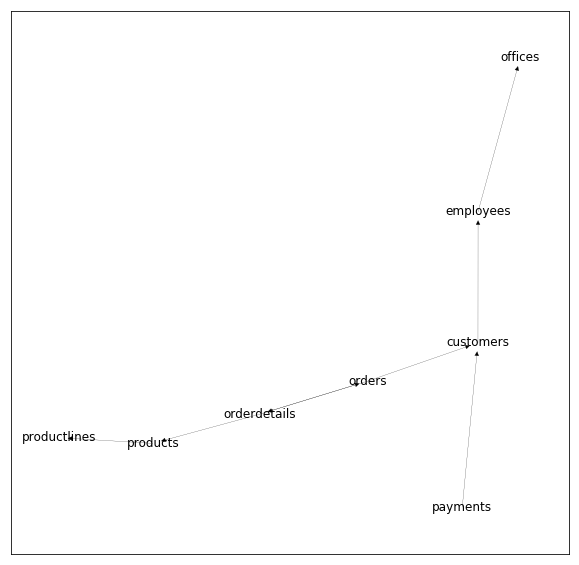

In [72]:
draw_db = db

G = nx.DiGraph()
G.add_nodes_from(draw_db.table_names)
for table_name in draw_db.table_names:
    for sibling in draw_db.find_table_siblings(table_name):
        G.add_edge(table_name, sibling)
        G.add_edge(sibling, table_name)
    for child in draw_db.find_table_children(table_name):
        G.add_edge(table_name, child)
plt.figure(figsize=(10,10))

#draw with networkx built-ins
nx.draw_networkx(G, node_shape="None", width=0.2)

#OR

#draw using pygraphviz
#A = nx.nx_agraph.to_agraph(G)
#H = nx.nx_agraph.from_agraph(A)
#nx.draw_spring(H, node_shape="None", with_labels=True, width=0.2)